<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84_%ED%8A%B8%EB%9F%BC%ED%94%84%EC%83%81%ED%98%B8%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법A: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and direc

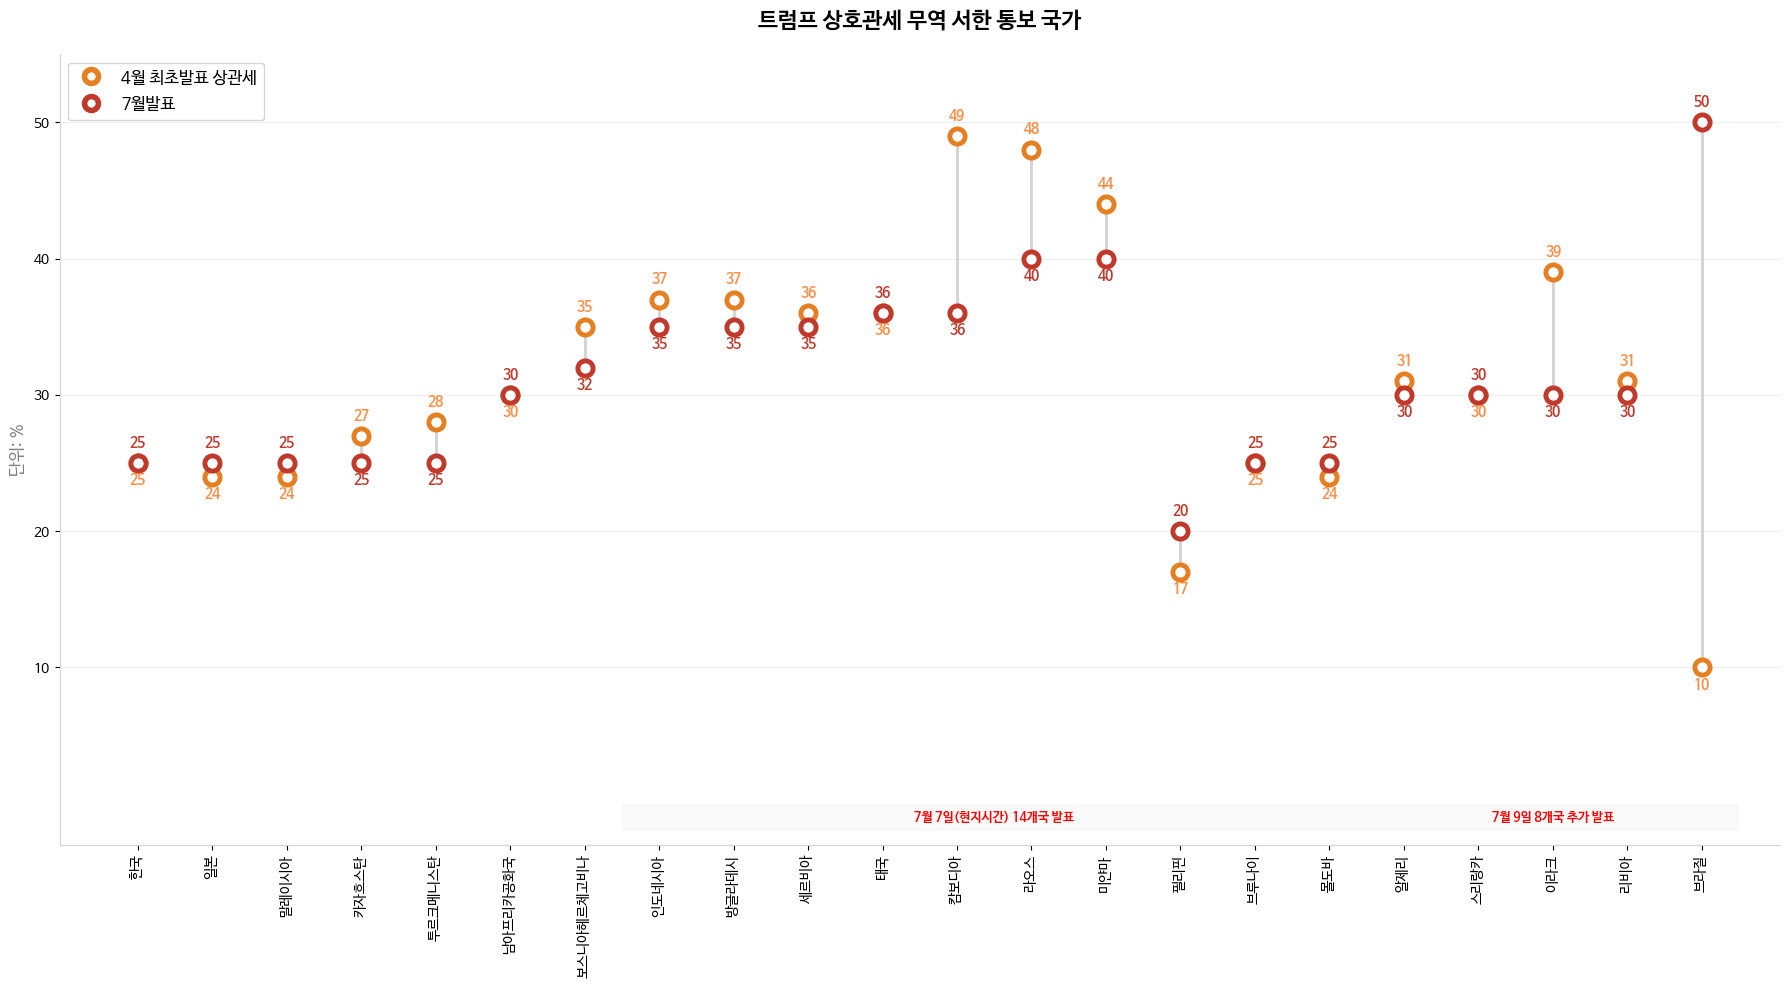

=== 트럼프 상호관세 데이터 요약 ===
총 22개국
4월 평균 상관세: 31.2%
7월 평균 상관세: 31.1%

상관세 증가 국가: 5개국
상관세 감소 국가: 12개국
상관세 불변 국가: 5개국


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import matplotlib.patches as patches


# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 설정
countries = ['한국', '일본', '말레이시아', '카자흐스탄', '투르크메니스탄', '남아프리카공화국', '보스니아헤르체고비나', '인도네시아', '방글라데시', '세르비아', '태국', '캄보디아', '라오스', '미얀마', '필리핀', '브루나이', '몰도바', '알제리', '스리랑카', '이라크', '리비아', '브라질']

# 4월 최초발표 상관세 데이터 (오렌지색 원)
april_data = [25, 24, 24, 27, 28, 30, 35, 37, 37, 36, 36, 49, 48, 44, 17, 25, 24, 31, 30, 39, 31, 10]

# 7월 발표 상관세 데이터 (빨간색 원)
july_data = [25, 25, 25, 25, 25, 30, 32, 35, 35, 35, 36, 36, 40, 40, 20, 25, 25, 30, 30, 30, 30, 50]

# 그래프 설정
fig, ax = plt.subplots(figsize=(18, 10))

# x축 위치
x_pos = np.arange(len(countries))

# 각 국가별로 수직선과 점 그리기
for i, (april_val, july_val) in enumerate(zip(april_data, july_data)):
    # 수직선 그리기 (회색)
    ax.plot([i, i], [min(april_val, july_val), max(april_val, july_val)],
            color='lightgray', linewidth=2, zorder=1)

    # 4월 데이터 점 (진한 오렌지색 테두리, 하얀색 안)
    ax.scatter(i, april_val, s=120, color='white', edgecolor='#E67E22',
               linewidth= 3.5, zorder=3)

    # 7월 데이터 점 (진한 빨간색 테두리, 하얀색 안)
    ax.scatter(i, july_val, s=120, color='white', edgecolor='#C0392B',
               linewidth= 3.5, zorder=3)

# 데이터 포인트에 값 표시
for i, (april_val, july_val) in enumerate(zip(april_data, july_data)):
    # 4월 데이터 값 (오렌지색)
    if april_val > july_val:
        ax.annotate(f'{april_val}', (i, april_val), textcoords="offset points",
                    xytext=(0,12), ha='center', fontsize=10, color='#FF8C42',
                    fontweight='bold')
        ax.annotate(f'{july_val}', (i, july_val), textcoords="offset points",
                    xytext=(0,-15), ha='center', fontsize=10, color='#C0392B',
                    fontweight='bold')
    else:
        ax.annotate(f'{july_val}', (i, july_val), textcoords="offset points",
                    xytext=(0,12), ha='center', fontsize=10, color='#C0392B',
                    fontweight='bold')
        ax.annotate(f'{april_val}', (i, april_val), textcoords="offset points",
                    xytext=(0,-15), ha='center', fontsize=10, color='#FF8C42',
                    fontweight='bold')

# 그래프 스타일링
ax.set_xlabel('')
ax.set_ylabel('단위: %', fontsize=12, color='gray')
ax.set_title('트럼프 상호관세 무역 서한 통보 국가', fontsize=16, fontweight='bold', pad=20)

# x축 설정
ax.set_xticks(x_pos)
ax.set_xticklabels(countries, rotation=90, ha='center', fontsize=10)

# y축 설정
ax.set_ylim(0, 55)
ax.set_yticks(range(10, 60, 10))
ax.set_yticklabels(['10', '20', '30', '40', '50'])

# 격자 추가 (수평선만)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, axis='y')
ax.set_axisbelow(True)

# 범례 만들기 (수동으로 생성)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white',
               markersize=10, label='4월 최초발표 상관세', markeredgecolor='#E67E22', markeredgewidth=4),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white',
               markersize=10, label='7월발표', markeredgecolor='#C0392B', markeredgewidth=4)
]
legend = ax.legend(handles=legend_elements, loc='upper left', frameon=True, fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.8)

# 특별 표시 영역 배경 (연한 회색)
# 7월 7일 14개국 발표 영역
rect1 = patches.Rectangle((6.5, -2), 10, 2, linewidth=0, facecolor='#F8F8F8', alpha=0.8)
ax.add_patch(rect1)

# 7월 9일 8개국 추가 발표 영역
rect2 = patches.Rectangle((16.5, -2), 5, 2, linewidth=0, facecolor='#F8F8F8', alpha=0.8)
ax.add_patch(rect2)

# 텍스트 추가
ax.text(11.5, -1, '7월 7일(현지시간) 14개국 발표', ha='center', va='center', fontsize=9,
        color='red', fontweight='bold')
ax.text(19, -1, '7월 9일 8개국 추가 발표', ha='center', va='center', fontsize=9,
        color='red', fontweight='bold')

# 축 스타일 조정
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

# y축 확장하여 텍스트 공간 확보
ax.set_ylim(-3, 55)

# 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# 그래프 표시
plt.show()

print("=== 트럼프 상호관세 데이터 요약 ===")
print(f"총 {len(countries)}개국")
print(f"4월 평균 상관세: {np.mean(april_data):.1f}%")
print(f"7월 평균 상관세: {np.mean(july_data):.1f}%")

# 변화량 계산
changes = [j - a for a, j in zip(april_data, july_data)]
increased = sum(1 for c in changes if c > 0)
decreased = sum(1 for c in changes if c < 0)
unchanged = sum(1 for c in changes if c == 0)

print(f"\n상관세 증가 국가: {increased}개국")
print(f"상관세 감소 국가: {decreased}개국")
print(f"상관세 불변 국가: {unchanged}개국")

In [ ]:


#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False